# Data Preprocesing


### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Datasets

### Olist E-Commerce Orders Dataset

In [2]:
orders=pd.read_csv(r"C:\Users\vivek\Downloads\archive\orders.csv")

In [3]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [5]:
orders.shape

(99441, 8)

In [6]:
orders.drop_duplicates(inplace=True)

In [7]:
orders.shape

(99441, 8)

In [8]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [9]:
orders['order_purchase_timestamp']=orders['order_purchase_timestamp'].astype('datetime64[ns]')
orders['order_approved_at']=orders['order_approved_at'].astype('datetime64[ns]')
orders['order_delivered_carrier_date']=orders['order_delivered_carrier_date'].astype('datetime64[ns]')
orders['order_delivered_customer_date']=orders['order_delivered_customer_date'].astype('datetime64[ns]')
orders['order_estimated_delivery_date']=orders['order_estimated_delivery_date'].astype('datetime64[ns]')

In [10]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [12]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
orders['order_approved_at'].fillna(orders['order_purchase_timestamp'], inplace=True)
orders['order_delivered_carrier_date'].fillna(orders['order_purchase_timestamp'], inplace=True)
orders['order_delivered_customer_date'].fillna(orders['order_estimated_delivery_date'], inplace=True)


C:\Users\vivek\AppData\Local\Temp\ipykernel_25812\1764979471.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders['order_approved_at'].fillna(orders['order_purchase_timestamp'], inplace=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_25812\1764979471.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [14]:
orders.shape

(99441, 8)

In [15]:
orders[orders['order_id']== '00b1cb0320190ca0daa2c88b35206009']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,2018-08-28 15:26:39,2018-08-28 15:26:39,2018-09-12,2018-09-12


In [16]:
orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [17]:
orders.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 19:07:21.164720896,2018-01-03 12:56:44.621051648,2018-01-13 06:50:40.982220800,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-09-05 00:15:34,2016-09-30 00:00:00,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 21:55:13,2017-09-14 20:17:48,2017-09-22 21:28:06,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 11:54:30,2018-01-23 16:47:06,2018-02-01 19:34:49,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-08 08:46:00,2018-05-15 17:51:03,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-11-12 00:00:00,2018-11-12 00:00:00


In [18]:
orders['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

[Text(0, 0, '96478'),
 Text(0, 0, '314'),
 Text(0, 0, '1107'),
 Text(0, 0, '301'),
 Text(0, 0, '609'),
 Text(0, 0, '625'),
 Text(0, 0, '5'),
 Text(0, 0, '2')]

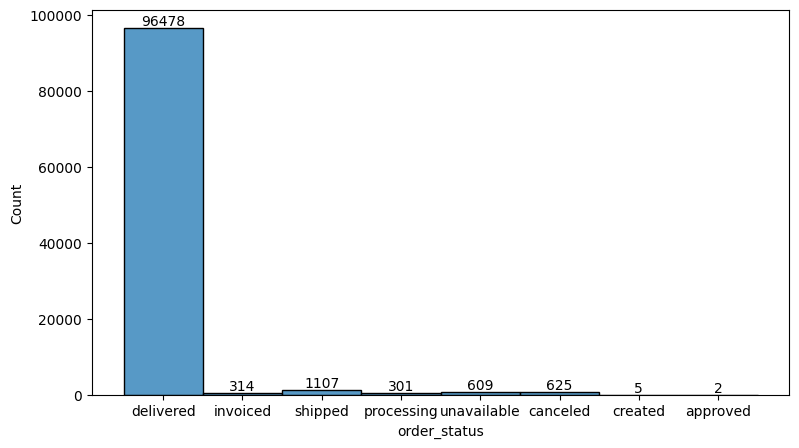

In [19]:
plt.figure(figsize=(9,5))
ax=sns.histplot(orders['order_status'])
ax.bar_label(ax.containers[0]) 

### Olist E-Commerce Customers Dataset

In [20]:
customers=pd.read_csv(r"C:\Users\vivek\Downloads\archive\customers.csv")

In [21]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [22]:
customers.shape

(99441, 5)

In [23]:
customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [24]:
customers.drop_duplicates(inplace=True)

In [25]:
customers.shape

(99441, 5)

In [26]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [27]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [28]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [29]:
customers['customer_city'].value_counts()

customer_city
sao paulo                   15540
rio de janeiro               6882
belo horizonte               2773
brasilia                     2131
curitiba                     1521
                            ...  
olhos d'agua                    1
pacotuba                        1
sao sebastiao do paraiba        1
benedito leite                  1
campos verdes                   1
Name: count, Length: 4119, dtype: int64

In [30]:
customers['customer_state'].value_counts()

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

### Olist E-Commerce Payments Dataset

In [31]:
payments=pd.read_csv(r"C:\Users\vivek\Downloads\archive\order_payments.csv")

In [32]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [33]:
payments.shape

(103886, 5)

In [34]:
payments.drop_duplicates(inplace=True)

In [35]:
payments.shape

(103886, 5)

In [36]:
payments.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [37]:
payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [38]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [39]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [40]:
payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [41]:
payments['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [42]:
payments['payment_installments'].value_counts()

payment_installments
1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: count, dtype: int64

In [43]:
payments['payment_sequential'].value_counts()

payment_sequential
1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
17        6
19        6
18        6
16        6
20        4
21        4
22        3
24        2
25        2
26        2
23        2
27        1
28        1
29        1
Name: count, dtype: int64

### Olist E-Commerce Orders Review Dataset

In [44]:
ord_review=pd.read_csv(r"C:\Users\vivek\Downloads\archive\order_reviews.csv")

In [45]:
ord_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [46]:
ord_review.shape

(99224, 7)

In [47]:
ord_review.drop_duplicates(inplace=True)

In [48]:
ord_review.shape

(99224, 7)

In [49]:
ord_review.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [50]:
ord_review.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [51]:
ord_review['review_creation_date']=ord_review['review_creation_date'].astype('datetime64[ns]')
ord_review['review_answer_timestamp']=ord_review['review_answer_timestamp'].astype('datetime64[ns]')

In [52]:
ord_review.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

In [53]:
ord_review.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [54]:
ord_review['review_comment_title'].fillna("No Title", inplace=True)
ord_review['review_comment_message'].fillna("No Comment", inplace=True)

C:\Users\vivek\AppData\Local\Temp\ipykernel_25812\2301296317.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ord_review['review_comment_title'].fillna("No Title", inplace=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_25812\2301296317.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [55]:
ord_review.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [56]:
ord_review.describe()

,review_score,review_creation_date,review_answer_timestamp
count,99224.000000,99224,99224
mean,4.086421,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,4.000000,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,5.000000,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,5.000000,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,1.347579,NaN,NaN


In [57]:
ord_review['review_score'].value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

### Olist E-Commerce Order Items Dataset

In [58]:
ord_items=pd.read_csv(r"C:\Users\vivek\Downloads\archive\order_items.csv")

In [59]:
ord_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [60]:
ord_items.shape

(112650, 7)

In [61]:
ord_items.drop_duplicates(inplace=True)

In [62]:
ord_items.shape

(112650, 7)

In [63]:
ord_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [64]:
ord_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [65]:
ord_items['shipping_limit_date']=ord_items['shipping_limit_date'].astype('datetime64[ns]')

In [66]:
ord_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [67]:
ord_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [68]:
ord_items.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


### Olist E-Commerce Products Dataset

In [69]:
products=pd.read_csv(r"C:\Users\vivek\Downloads\archive\products.csv")

In [70]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [71]:
products.shape

(32951, 9)

In [72]:
products.drop_duplicates(inplace=True)

In [73]:
products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [74]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [75]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [76]:
products['product_category_name'].fillna('No Data',inplace=True)
products['product_name_lenght'].fillna(0,inplace=True)
products['product_description_lenght'].fillna(0,inplace=True)
products['product_photos_qty'].fillna(0,inplace=True)

C:\Users\vivek\AppData\Local\Temp\ipykernel_25812\306156023.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['product_category_name'].fillna('No Data',inplace=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_25812\306156023.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [77]:
products['product_weight_g'].fillna(products['product_weight_g'].median(),inplace=True)
products['product_length_cm'].fillna(products['product_length_cm'].median(),inplace=True)
products['product_height_cm'].fillna(products['product_height_cm'].median(),inplace=True)
products['product_width_cm'].fillna(products['product_width_cm'].median(),inplace=True)



C:\Users\vivek\AppData\Local\Temp\ipykernel_25812\3032246556.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['product_weight_g'].fillna(products['product_weight_g'].median(),inplace=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_25812\3032246556.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [78]:
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [79]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,47.579527,757.213104,2.148463,2276.376802,30.814725,16.937422,23.196534
std,12.071951,637.745057,1.745732,4281.926387,16.914005,13.637175,12.078707
min,0.000000,0.000000,0.000000,0.000000,7.000000,2.000000,6.000000
25%,41.000000,326.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [80]:
products['product_category_name'].value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 74, dtype: int64

### Olist E-Commerce Sellers Dataset

In [81]:
sellers=pd.read_csv(r"C:\Users\vivek\Downloads\archive\sellers.csv")

In [82]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [83]:
sellers.shape

(3095, 4)

In [84]:
sellers.drop_duplicates(inplace=True)

In [85]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [86]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [87]:
sellers['seller_city'].value_counts().head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: count, dtype: int64

In [88]:
sellers['seller_state'].value_counts().head(10)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: count, dtype: int64

### Olist E-Commerce Geolocatioon Dataset

In [89]:
geolocation=pd.read_csv(r"C:\Users\vivek\Downloads\archive\geolocation.csv")

In [90]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [91]:
geolocation.shape

(1000163, 5)

In [92]:
geolocation.drop_duplicates(inplace=True)

In [93]:
geolocation.shape

(738332, 5)

In [94]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


In [95]:
geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [96]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,738332.000000,738332.000000,738332.000000
mean,38316.086800,-20.998353,-46.461098
std,30632.496675,5.892315,4.393705
min,1001.000000,-36.605374,-101.466766
25%,12600.000000,-23.603061,-48.867822
50%,29144.000000,-22.873588,-46.647278
75%,65950.000000,-19.923336,-43.836974
max,99990.000000,45.065933,121.105394


In [97]:
geolocation['geolocation_city'].value_counts().head(20)

geolocation_city
sao paulo                79927
rio de janeiro           35177
são paulo                19718
belo horizonte           19474
curitiba                 11263
porto alegre              8702
salvador                  8083
guarulhos                 7411
brasilia                  6919
osasco                    4993
sao bernardo do campo     4732
santo andre               4697
recife                    4428
fortaleza                 4326
campinas                  4182
sorocaba                  4124
goiania                   3647
contagem                  3519
juiz de fora              3495
campo grande              3452
Name: count, dtype: int64

In [98]:
geolocation['geolocation_state'].value_counts()

geolocation_state
SP    285976
MG    101353
RJ     78836
RS     48093
PR     45059
SC     30191
BA     27720
GO     15601
PE     13162
ES     12632
CE      9541
MT      9374
DF      9080
MS      8594
PA      8551
MA      6277
PB      4787
RN      4014
PI      3592
AL      3415
TO      2977
SE      2653
RO      2523
AM      1986
AC      1039
AP       738
RR       568
Name: count, dtype: int64

### Olist E-Commerce Product Category Name (English) Dataset

In [99]:
category_name_english=pd.read_csv(r"C:\Users\vivek\Downloads\archive\category_name_translation.csv")

In [100]:
category_name_english.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [101]:
category_name_english.shape

(71, 2)

In [102]:
category_name_english.drop_duplicates(inplace=True)

In [103]:
category_name_english.shape

(71, 2)

In [104]:
category_name_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [105]:
category_name_english.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [106]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


In [107]:
# customers = customers.merge(
#     geolocation[['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state']], 
#     left_on='customer_zip_code_prefix', 
#     right_on='geolocation_zip_code_prefix'
# )


In [108]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


### Merge Dataset

In [109]:
cat=products.merge(category_name_english,on='product_category_name').head(20)

In [110]:
full_df = orders.merge(ord_review, on='order_id')\
                   .merge(payments, on='order_id')\
                   .merge(customers, on='customer_id')\
                   .merge(ord_items, on='order_id')\
                   .merge(products, on='product_id')\
                   .merge(sellers, on='seller_id')

In [111]:
full_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP


In [112]:
def df_summary(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Column'] = summary['index']
    summary = summary[['Column','dtypes']]
    summary['# Missing'] = df.isnull().sum().values    
    summary['# Unique'] = df.nunique().values
    summary['Example'] = df.loc[0].values

    for name in summary['Column'].value_counts().index:
        summary.loc[summary['Column'] == name]

    return summary
    
df_summary(full_df)

Dataset Shape: (117329, 39)


,Column,dtypes,# Missing,# Unique,Example
0,order_id,object,0,97916,e481f51cbdc54678b7cc49136f2d6af7
1,customer_id,object,0,97916,9ef432eb6251297304e76186b10a928d
2,order_status,object,0,7,delivered
3,order_purchase_timestamp,datetime64[ns],0,97370,2017-10-02 10:56:33
4,order_approved_at,datetime64[ns],0,89547,2017-10-02 11:07:15
5,order_delivered_carrier_date,datetime64[ns],0,81439,2017-10-04 19:55:00
6,order_delivered_customer_date,datetime64[ns],0,95405,2017-10-10 21:25:13
7,order_estimated_delivery_date,datetime64[ns],0,449,2017-10-18 00:00:00
8,review_id,object,0,97708,a54f0611adc9ed256b57ede6b6eb5114
9,review_score,int64,0,5,4


### Feature Engineering

In [113]:
full_df['delivery_time'] = (pd.to_datetime(full_df['order_delivered_customer_date']) - pd.to_datetime(full_df['order_purchase_timestamp'])).dt.days

In [114]:
full_df['delivery_time'].head(15)

0      8
1      8
2      8
3     13
4      9
5     13
6      2
7     16
8     27
9      9
10     9
11    18
12    18
13    12
14    12
Name: delivery_time, dtype: int64

In [115]:
# Total revenue per customer
customer_revenue = full_df.groupby('customer_id')['payment_value'].sum().reset_index()
customer_revenue.rename(columns={'payment_value': 'lifetime_value'}, inplace=True)

customer_revenue


,customer_id,lifetime_value
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01
...,...,...
97911,fffcb937e9dd47a13f05ecb8290f4d3e,91.91
97912,fffecc9f79fd8c764f843e9951b11341,81.36
97913,fffeda5b6d849fbd39689bb92087f431,63.13
97914,ffff42319e9b2d713724ae527742af25,214.13


In [116]:
full_df['order_count'] = full_df.groupby('customer_id')['order_id'].transform('count')
full_df['order_count']

0         3
1         3
2         3
3         1
4         1
         ..
117324    1
117325    1
117326    2
117327    2
117328    1
Name: order_count, Length: 117329, dtype: int64

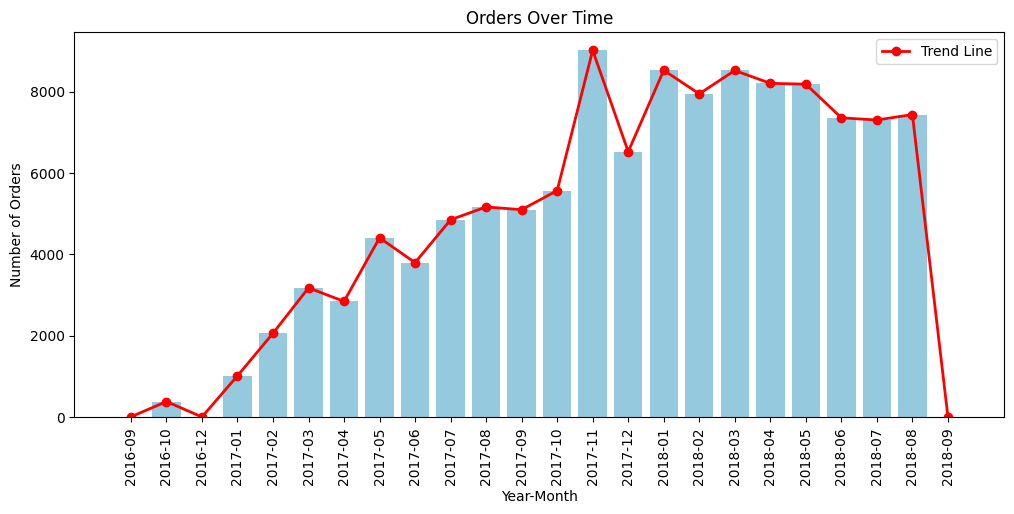

In [117]:

# Extract year & month for trend analysis
full_df['year_month'] = full_df['order_purchase_timestamp'].dt.to_period('M')

# Count orders per month
monthly_orders = full_df['year_month'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 5))

# Countplot
sns.countplot(x=full_df['year_month'].astype(str), order=sorted(full_df['year_month'].astype(str).unique()), color='skyblue')

# Line plot
plt.plot(monthly_orders.index.astype(str), monthly_orders.values, marker='o', color='red', linestyle='-', linewidth=2, label="Trend Line")

# Formatting
plt.xticks(rotation=90)
plt.title("Orders Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Orders")
plt.legend()
plt.show()


C:\Users\vivek\AppData\Local\Temp\ipykernel_25812\3038487483.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_delivery, x='delivery_days', y='customer_state', palette='coolwarm')


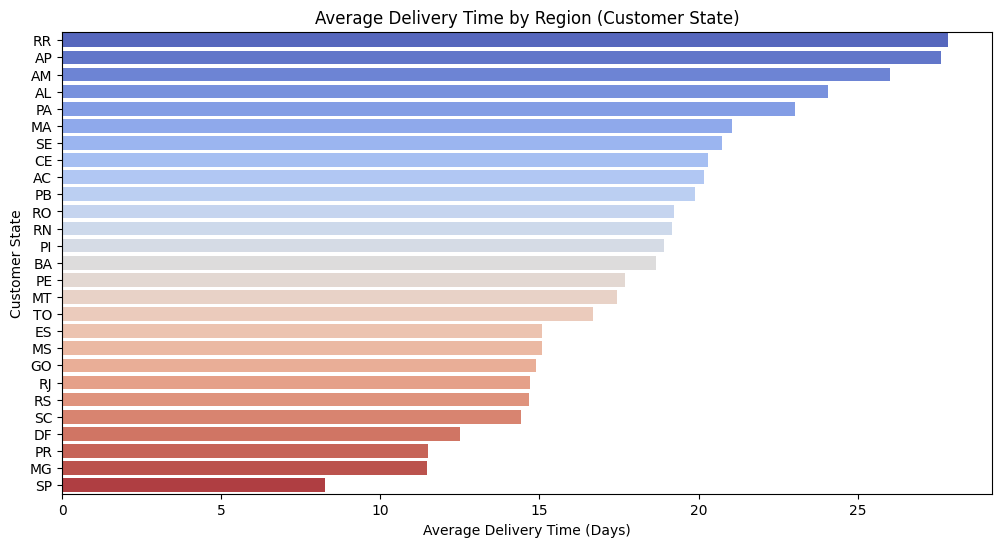

C:\Users\vivek\AppData\Local\Temp\ipykernel_25812\3038487483.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_reviews, x='review_score', y='customer_state', palette='viridis')


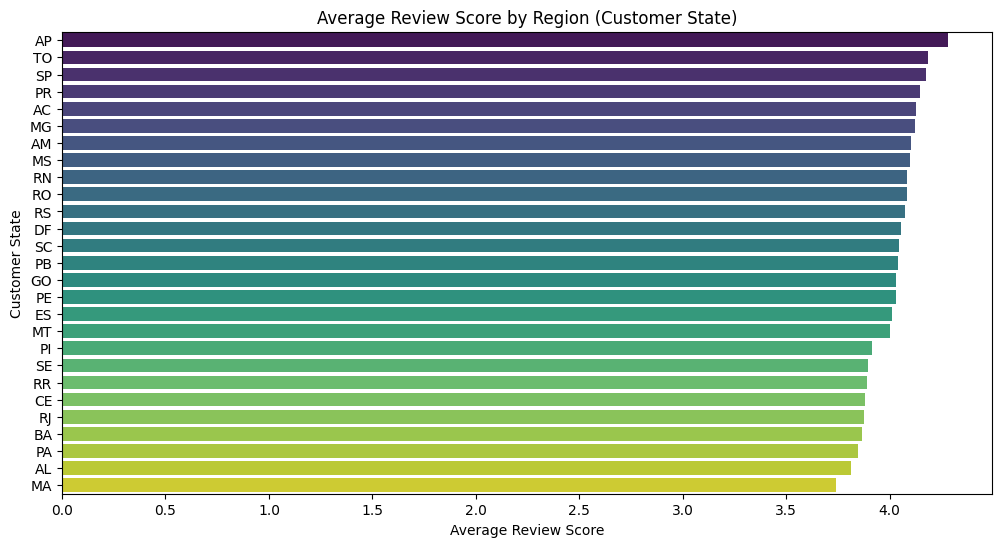

🔹 Best 10 Sellers by Review Score:
                              seller_id  review_score
2933  fe19dce63ae80346207c6c55713d1023           5.0
3     003554e2dce176b5555353e4f3555ac8           5.0
6     00ab3eff1b5192e5f1a63bcecfee11c8           5.0
7     00d8b143d12632bad99c0ad66ad52825           5.0
13    01266d4c46afa519678d16a8b683d325           5.0
2944  feb793c88d836c3a75efa4b5a3465d70           5.0
1669  8dd386be0767c330276ea6a3f96532d3           5.0
1670  8de8fe3af4449ed695d2434c933ed73e           5.0
722   3e51f9cbe317bc3a88f2c76583811ee4           5.0
2396  cd233f8bfa30ebfd651f47ee7d054951           5.0

🔹 Worst 10 Sellers by Review Score:
                              seller_id  review_score
11    010da0602d7774602cd1b3f5fb7b709e           1.0
1278  6d04126aba80df143fd038e711b8fd96           1.0
773   42d4b7e70819438f5ada61c965e92d7e           1.0
2338  c87abc38c8ed3240861729e1aeadf221           1.0
2414  cecd97bc34ed8330bd4cd15713eda670           1.0
1985  ab75b89cc49c9ab3160

C:\Users\vivek\AppData\Local\Temp\ipykernel_25812\3038487483.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=completed_orders['review_score'], y=completed_orders['delivery_days'], palette='Set2')


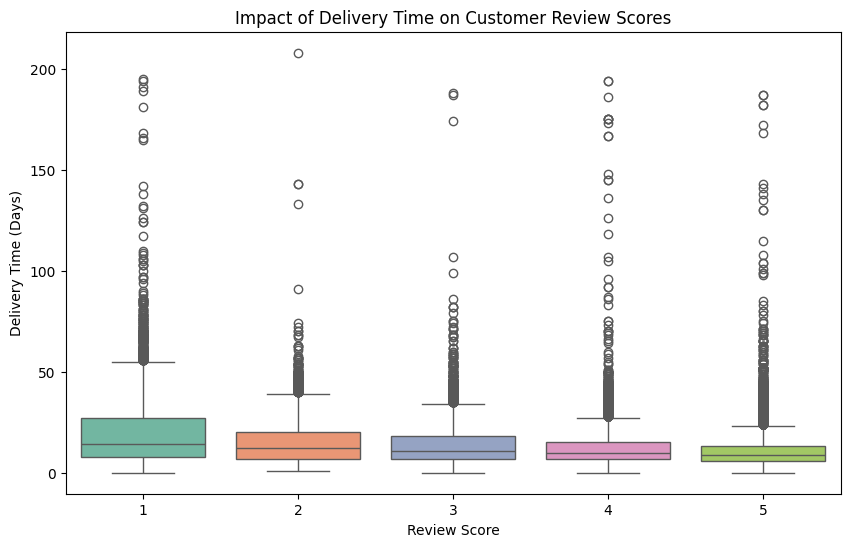

In [118]:
# Calculate actual delivery time
full_df['delivery_days'] = (full_df['order_delivered_customer_date'] - full_df['order_purchase_timestamp']).dt.days

# Calculate delivery delay (positive values mean late delivery)
full_df['delay_days'] = (full_df['order_delivered_customer_date'] - full_df['order_estimated_delivery_date']).dt.days

# Filter only completed orders
completed_orders = full_df[full_df['order_status'] == 'delivered']

# 1️⃣ Delivery Time by Region (State-wise Fulfillment)
state_delivery = completed_orders.groupby('customer_state')['delivery_days'].mean().reset_index()
state_delivery = state_delivery.sort_values(by='delivery_days', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=state_delivery, x='delivery_days', y='customer_state', palette='coolwarm')
plt.title("Average Delivery Time by Region (Customer State)")
plt.xlabel("Average Delivery Time (Days)")
plt.ylabel("Customer State")
plt.show()

# 2️⃣ Review Scores by Region (Customer Satisfaction by State)
state_reviews = completed_orders.groupby('customer_state')['review_score'].mean().reset_index()
state_reviews = state_reviews.sort_values(by='review_score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=state_reviews, x='review_score', y='customer_state', palette='viridis')
plt.title("Average Review Score by Region (Customer State)")
plt.xlabel("Average Review Score")
plt.ylabel("Customer State")
plt.show()

# 3️⃣ Seller Performance (Best & Worst Sellers by Review Score)
seller_ratings = completed_orders.groupby('seller_id')['review_score'].mean().reset_index()
best_sellers = seller_ratings.sort_values(by='review_score', ascending=False).head(10)
worst_sellers = seller_ratings.sort_values(by='review_score', ascending=True).head(10)

print("🔹 Best 10 Sellers by Review Score:\n", best_sellers)
print("\n🔹 Worst 10 Sellers by Review Score:\n", worst_sellers)

# 4️⃣ Seller Fulfillment Speed (Fastest & Slowest Sellers)
seller_delivery = completed_orders.groupby('seller_id')['delivery_days'].mean().reset_index()
fastest_sellers = seller_delivery.sort_values(by='delivery_days', ascending=True).head(10)
slowest_sellers = seller_delivery.sort_values(by='delivery_days', ascending=False).head(10)

print("🚀 Fastest 10 Sellers (Quickest Order Fulfillment):\n", fastest_sellers)
print("\n🐌 Slowest 10 Sellers (Longest Order Fulfillment):\n", slowest_sellers)

# 5️⃣ Impact of Delivery Time on Review Score
plt.figure(figsize=(10, 6))
sns.boxplot(x=completed_orders['review_score'], y=completed_orders['delivery_days'], palette='Set2')
plt.title("Impact of Delivery Time on Customer Review Scores")
plt.xlabel("Review Score")
plt.ylabel("Delivery Time (Days)")
plt.show()


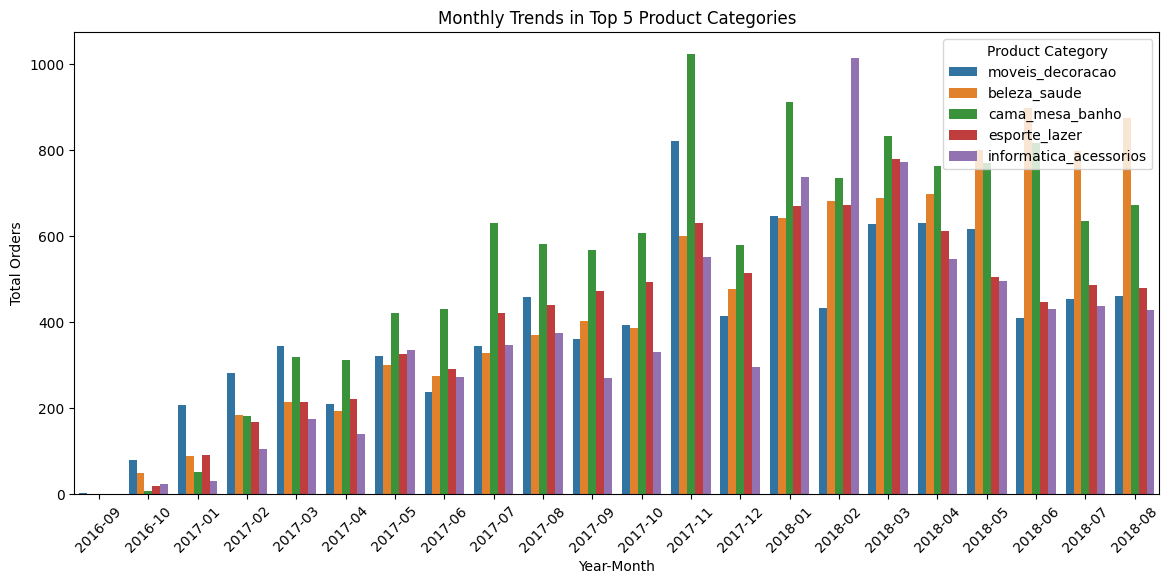

C:\Users\vivek\AppData\Local\Temp\ipykernel_25812\450178228.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="coolwarm")


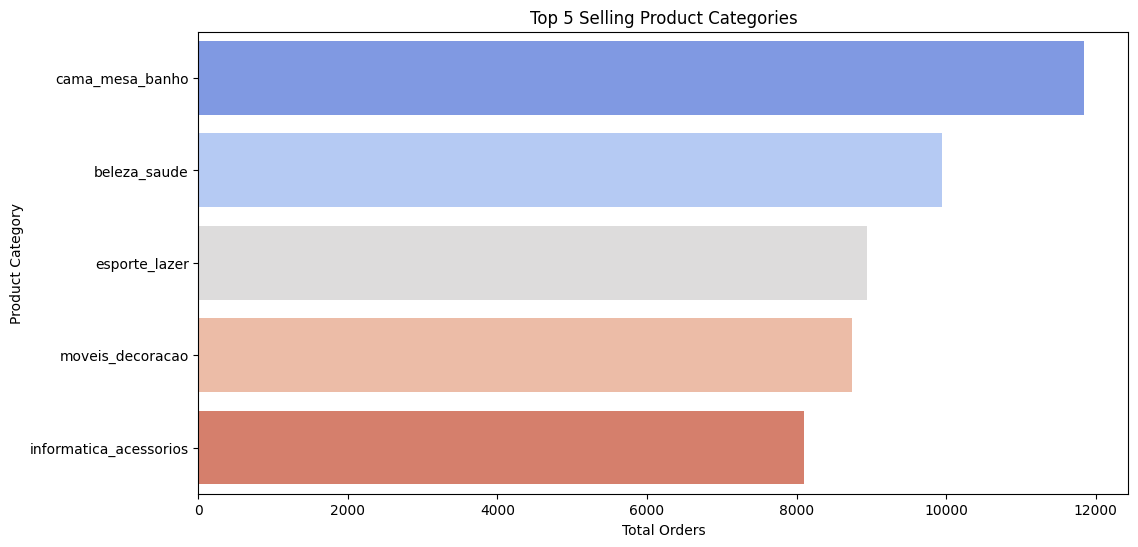

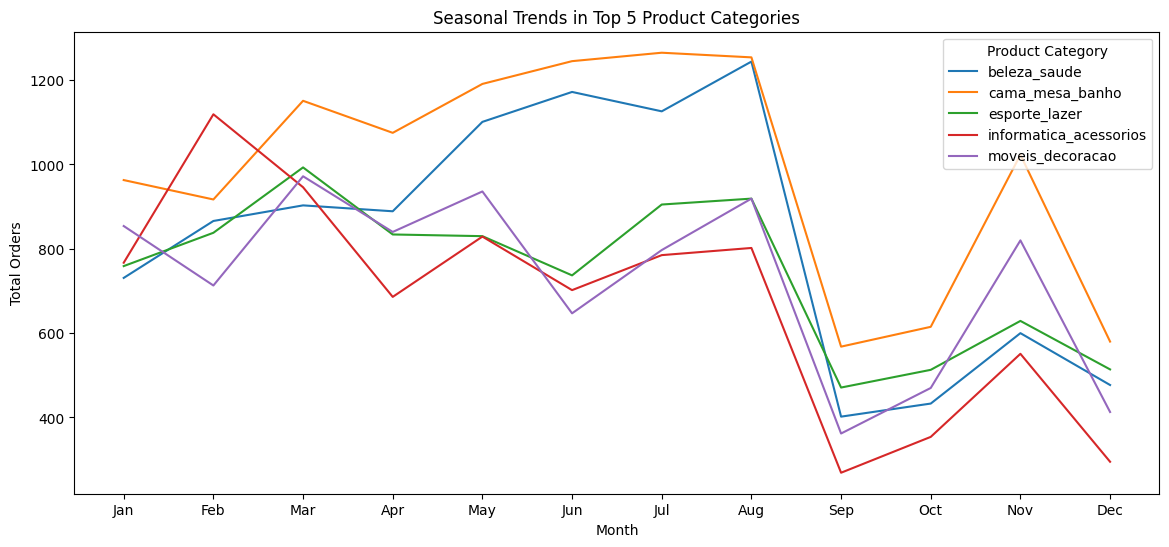

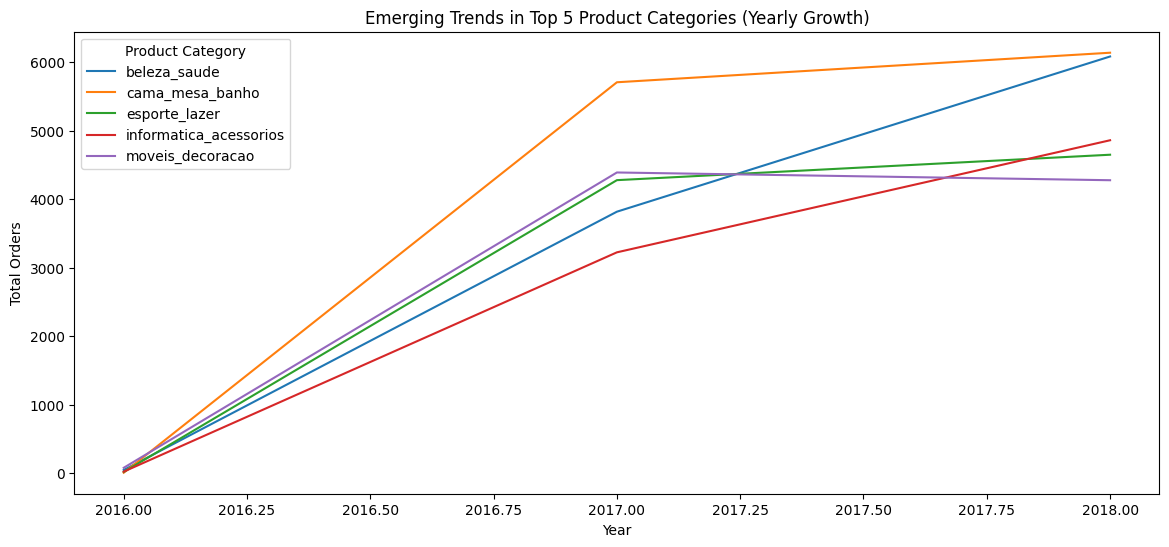

In [119]:
# Identify the top 5 selling product categories
top_5_categories = full_df['product_category_name'].value_counts().head(5).index.tolist()

# Monthly Sales Trends for Product Categories (Only Top 5)
category_trends = (
    full_df[full_df['product_category_name'].isin(top_5_categories)]
    .groupby(['year_month', 'product_category_name'])['order_id']
    .count()
    .reset_index()
)

category_trends['year_month'] = category_trends['year_month'].astype(str)
category_trends.rename(columns={'order_id': 'total_orders'}, inplace=True)

plt.figure(figsize=(14, 6))
sns.barplot(data=category_trends, x='year_month', y='total_orders', hue='product_category_name')
plt.title("Monthly Trends in Top 5 Product Categories")
plt.xlabel("Year-Month")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.legend(title="Product Category", loc='upper right')
plt.show()

# Top Selling Product Categories (Only Top 5)
top_categories = full_df['product_category_name'].value_counts().head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="coolwarm")
plt.title("Top 5 Selling Product Categories")
plt.xlabel("Total Orders")
plt.ylabel("Product Category")
plt.show()

# Seasonal Trends in Product Categories (Only Top 5)
seasonal_trends = (
    full_df[full_df['product_category_name'].isin(top_5_categories)]
    .groupby([full_df['order_purchase_timestamp'].dt.month, 'product_category_name'])['order_id']
    .count()
    .reset_index()
)

seasonal_trends.rename(columns={'order_id': 'total_orders', 'order_purchase_timestamp': 'month'}, inplace=True)

plt.figure(figsize=(14, 6))
sns.lineplot(data=seasonal_trends, x='month', y='total_orders', hue='product_category_name')
plt.title("Seasonal Trends in Top 5 Product Categories")
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Product Category", loc='upper right')
plt.show()

# Emerging Product Categories (Only Top 5)
yearly_trends = (
    full_df[full_df['product_category_name'].isin(top_5_categories)]
    .groupby([full_df['order_purchase_timestamp'].dt.year, 'product_category_name'])['order_id']
    .count()
    .reset_index()
)

yearly_trends.rename(columns={'order_id': 'total_orders'}, inplace=True)

plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_trends, x='order_purchase_timestamp', y='total_orders', hue='product_category_name')
plt.title("Emerging Trends in Top 5 Product Categories (Yearly Growth)")
plt.xlabel("Year")
plt.ylabel("Total Orders")
plt.legend(title="Product Category", loc='upper left')
plt.show()


In [120]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117329 non-null  object        
 1   customer_id                    117329 non-null  object        
 2   order_status                   117329 non-null  object        
 3   order_purchase_timestamp       117329 non-null  datetime64[ns]
 4   order_approved_at              117329 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117329 non-null  datetime64[ns]
 6   order_delivered_customer_date  117329 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117329 non-null  datetime64[ns]
 8   review_id                      117329 non-null  object        
 9   review_score                   117329 non-null  int64         
 10  review_comment_title           117329 non-null  object        
 11  

## Advanced Business & Data Questions 

### Customer & Order Behaviour

Percentage of Repeat Customers: 3.03%


C:\Users\vivek\AppData\Local\Temp\ipykernel_25812\4136260990.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=repeat_category_trends['repeat_orders'], y=repeat_category_trends['product_category_name'], palette="coolwarm")


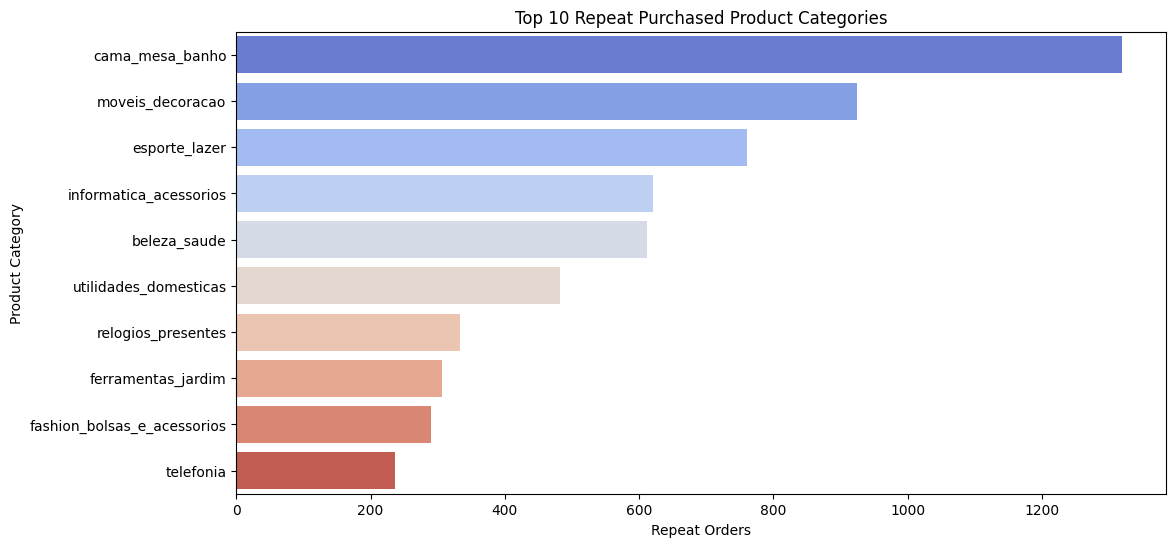

C:\Users\vivek\AppData\Local\Temp\ipykernel_25812\4136260990.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=discount_impact['discount_applied'].astype(str), y=discount_impact['repeat_customers'], palette=['red', 'green'])


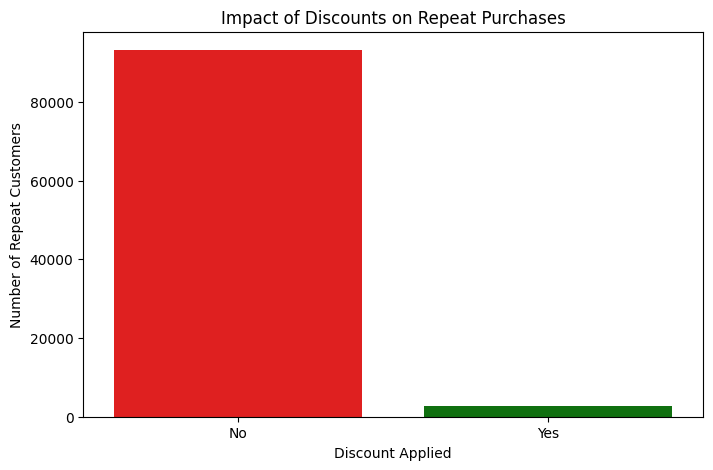

C:\Users\vivek\AppData\Local\Temp\ipykernel_25812\4136260990.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=full_df['repeat'], y=full_df['delivery_days'], palette=['red', 'green'])


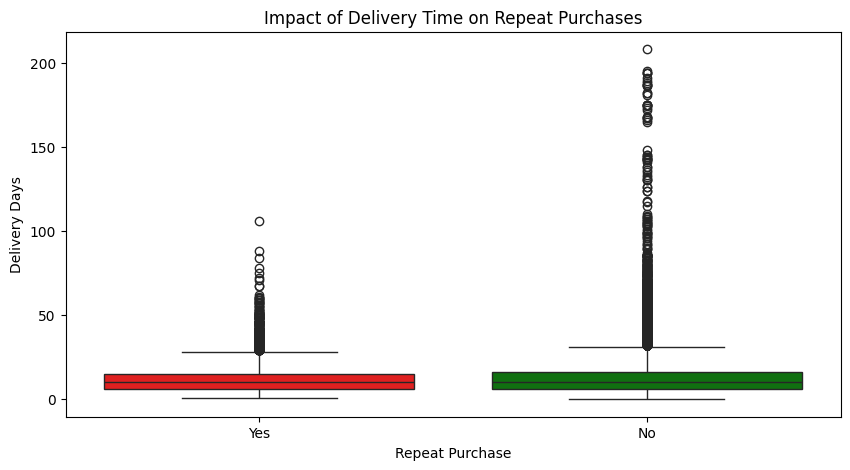

Average Review Score for Repeat Customers: 4.09
Average Review Score for Non-Repeat Customers: 4.03


C:\Users\vivek\AppData\Local\Temp\ipykernel_25812\4136260990.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Non-Repeat Customers", "Repeat Customers"], y=[non_repeat_review, repeat_review], palette=['red', 'green'])


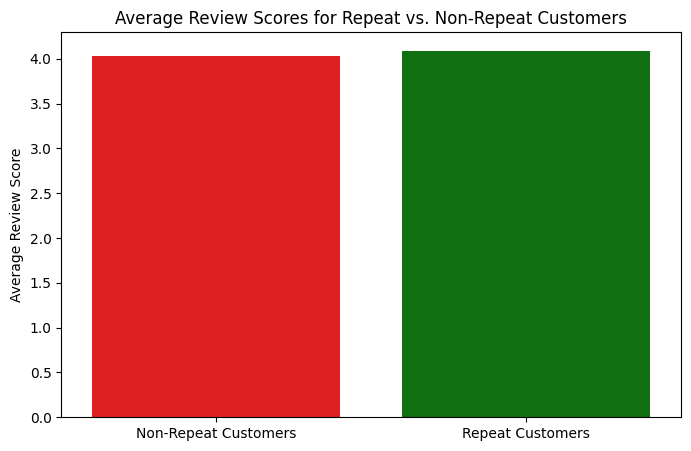

In [121]:


# Identify Repeat Customers
repeat_customers = full_df.groupby('customer_unique_id')['order_id'].nunique().reset_index()
repeat_customers.rename(columns={'order_id': 'total_orders'}, inplace=True)
repeat_customers = repeat_customers[repeat_customers['total_orders'] > 1] 

repeat_percentage = (len(repeat_customers) / full_df['customer_unique_id'].nunique()) * 100
print(f"Percentage of Repeat Customers: {repeat_percentage:.2f}%")

# Top Categories Driving Repeat Purchases 
repeat_customer_data = full_df[full_df['customer_unique_id'].isin(repeat_customers['customer_unique_id'])]

repeat_category_trends = repeat_customer_data.groupby('product_category_name')['order_id'].count().reset_index()
repeat_category_trends.rename(columns={'order_id': 'repeat_orders'}, inplace=True)
repeat_category_trends = repeat_category_trends.sort_values(by='repeat_orders', ascending=False).head(10)

# Visualization: Top Repeat Purchased Categories
plt.figure(figsize=(12, 6))
sns.barplot(x=repeat_category_trends['repeat_orders'], y=repeat_category_trends['product_category_name'], palette="coolwarm")
plt.title("Top 10 Repeat Purchased Product Categories")
plt.xlabel("Repeat Orders")
plt.ylabel("Product Category")
plt.show()

# Impact of Discounts on Repeat Purchases 
full_df['discount_applied'] = full_df['payment_value'] < full_df['price']

discount_impact = full_df.groupby('discount_applied')['customer_unique_id'].nunique().reset_index()
discount_impact.rename(columns={'customer_unique_id': 'repeat_customers'}, inplace=True)

# Visualization: Discounts & Repeat Purchases
plt.figure(figsize=(8, 5))
sns.barplot(x=discount_impact['discount_applied'].astype(str), y=discount_impact['repeat_customers'], palette=['red', 'green'])
plt.title("Impact of Discounts on Repeat Purchases")
plt.xlabel("Discount Applied")
plt.ylabel("Number of Repeat Customers")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

# Impact of Delivery Time on Repeat Purchases #
full_df['repeat'] = full_df['customer_unique_id'].apply(lambda x: 'Yes' if x in repeat_customers['customer_unique_id'].values else 'No')

# Visualization: Delivery Days Comparison
plt.figure(figsize=(10, 5))
sns.boxplot(x=full_df['repeat'], y=full_df['delivery_days'], palette=['red', 'green'])
plt.title("Impact of Delivery Time on Repeat Purchases")
plt.xlabel("Repeat Purchase")
plt.ylabel("Delivery Days")
plt.show()

# Customer Reviews & Repeat Purchases 
repeat_review = repeat_customer_data['review_score'].mean()
non_repeat_review = full_df[~full_df['customer_unique_id'].isin(repeat_customers['customer_unique_id'])]['review_score'].mean()

print(f"Average Review Score for Repeat Customers: {repeat_review:.2f}")
print(f"Average Review Score for Non-Repeat Customers: {non_repeat_review:.2f}")

# Visualization: Review Scores of Repeat vs. Non-Repeat Customers
plt.figure(figsize=(8, 5))
sns.barplot(x=["Non-Repeat Customers", "Repeat Customers"], y=[non_repeat_review, repeat_review], palette=['red', 'green'])
plt.title("Average Review Scores for Repeat vs. Non-Repeat Customers")
plt.ylabel("Average Review Score")
plt.show()


C:\Users\vivek\AppData\Local\Temp\ipykernel_25812\2332060687.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_data.sort_values(by='total_orders', ascending=False), x='customer_state', y='total_orders', palette="coolwarm")


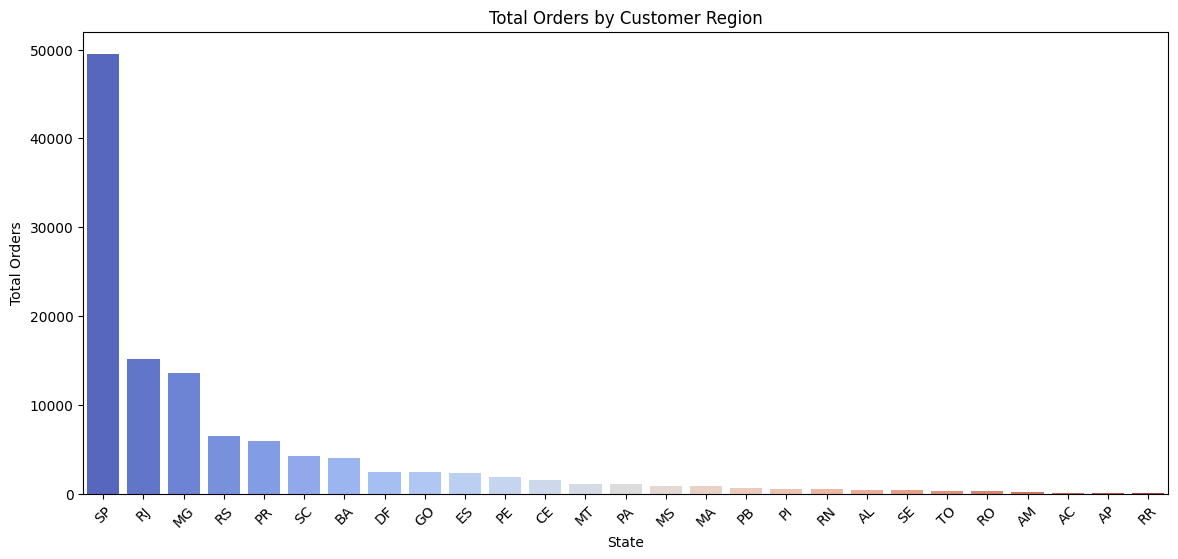

C:\Users\vivek\AppData\Local\Temp\ipykernel_25812\2332060687.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=order_frequency, x='customer_segment', palette="viridis", order=['One-time Buyers', 'Occasional Buyers', 'Frequent Buyers', 'Loyal Customers'])


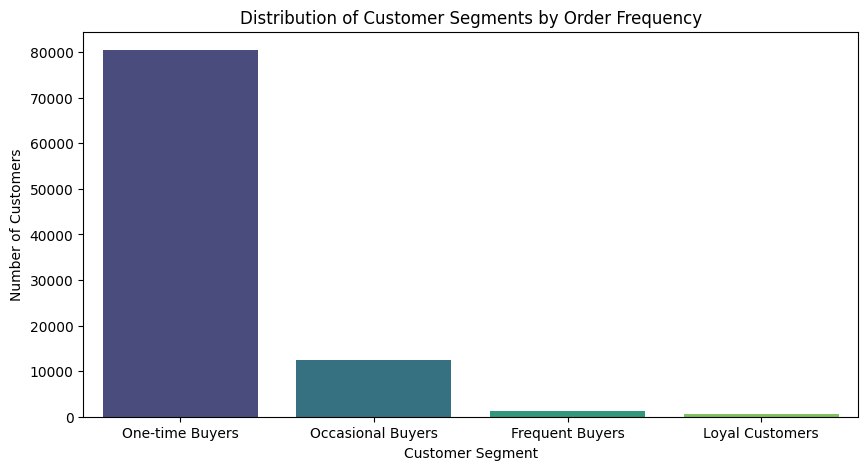

C:\Users\vivek\AppData\Local\Temp\ipykernel_25812\2332060687.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='customer_tier', palette="mako", order=['Low Spenders', 'Mid Spenders', 'High Spenders', 'Premium Customers'])


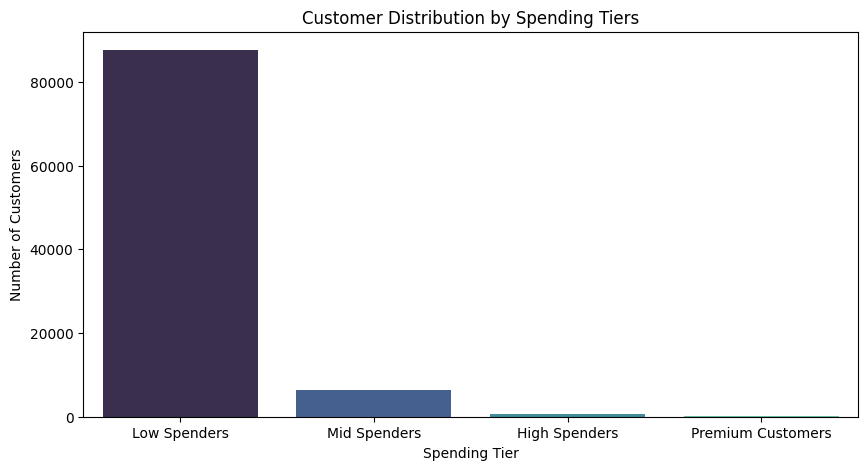

C:\Users\vivek\AppData\Local\Temp\ipykernel_25812\2332060687.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_value_regions, x='customer_state', y='customer_unique_id', palette="flare")


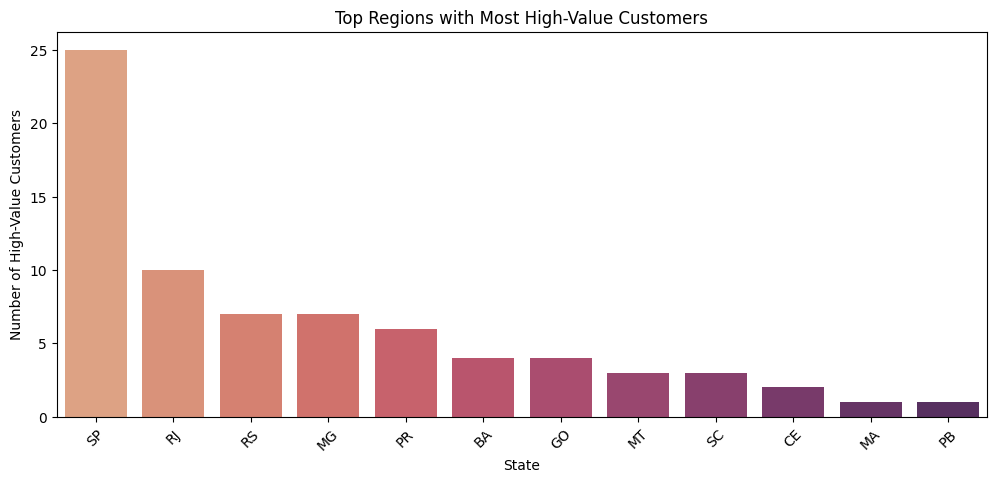

In [122]:
# Customer Segmentation by Region 
region_data = full_df.groupby('customer_state').agg(
    total_orders=('order_id', 'count'),
    total_spent=('payment_value', 'sum'),
    avg_order_value=('payment_value', 'mean')
).reset_index()

# Visualization: Customer Orders by State
plt.figure(figsize=(14, 6))
sns.barplot(data=region_data.sort_values(by='total_orders', ascending=False), x='customer_state', y='total_orders', palette="coolwarm")
plt.title("Total Orders by Customer Region")
plt.xlabel("State")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.show()

# Order Frequency & Customer Segments 
order_frequency = full_df.groupby('customer_unique_id').agg(
    total_orders=('order_id', 'count'),
    total_spent=('payment_value', 'sum'),
    avg_order_value=('payment_value', 'mean')
).reset_index()

# Define Customer Segments Based on Order Frequency
order_frequency['customer_segment'] = pd.cut(
    order_frequency['total_orders'], bins=[0, 1, 3, 5, float('inf')],
    labels=['One-time Buyers', 'Occasional Buyers', 'Frequent Buyers', 'Loyal Customers']
)

# Visualization: Customer Segments by Order Frequency
plt.figure(figsize=(10, 5))
sns.countplot(data=order_frequency, x='customer_segment', palette="viridis", order=['One-time Buyers', 'Occasional Buyers', 'Frequent Buyers', 'Loyal Customers'])
plt.title("Distribution of Customer Segments by Order Frequency")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.show()

# RFM Analysis (Recency, Frequency, Monetary Value) 
rfm = full_df.groupby('customer_unique_id').agg(
    recency=('order_purchase_timestamp', lambda x: (full_df['order_purchase_timestamp'].max() - x.max()).days),
    frequency=('order_id', 'count'),
    monetary=('payment_value', 'sum')
).reset_index()

# Define Customer Tiers Based on Spending Behavior
rfm['customer_tier'] = pd.cut(
    rfm['monetary'], bins=[0, 500, 2000, 5000, float('inf')],
    labels=['Low Spenders', 'Mid Spenders', 'High Spenders', 'Premium Customers']
)

# Visualization: Spending Tiers Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=rfm, x='customer_tier', palette="mako", order=['Low Spenders', 'Mid Spenders', 'High Spenders', 'Premium Customers'])
plt.title("Customer Distribution by Spending Tiers")
plt.xlabel("Spending Tier")
plt.ylabel("Number of Customers")
plt.show()

# Opportunities for Marketing Personalization 

# Finding High-Value Customers for Loyalty Programs
high_value_customers = rfm[(rfm['customer_tier'] == 'Premium Customers') & (rfm['frequency'] > 5)]

# Finding Regions with Most High-Value Customers
high_value_regions = full_df[full_df['customer_unique_id'].isin(high_value_customers['customer_unique_id'])].groupby('customer_state')['customer_unique_id'].nunique().reset_index()
high_value_regions = high_value_regions.sort_values(by='customer_unique_id', ascending=False)

# Visualization: Top Regions for High-Value Customers
plt.figure(figsize=(12, 5))
sns.barplot(data=high_value_regions, x='customer_state', y='customer_unique_id', palette="flare")
plt.title("Top Regions with Most High-Value Customers")
plt.xlabel("State")
plt.ylabel("Number of High-Value Customers")
plt.xticks(rotation=45)
plt.show()


In [123]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117329 non-null  object        
 1   customer_id                    117329 non-null  object        
 2   order_status                   117329 non-null  object        
 3   order_purchase_timestamp       117329 non-null  datetime64[ns]
 4   order_approved_at              117329 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117329 non-null  datetime64[ns]
 6   order_delivered_customer_date  117329 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117329 non-null  datetime64[ns]
 8   review_id                      117329 non-null  object        
 9   review_score                   117329 non-null  int64         
 10  review_comment_title           117329 non-null  object        
 11  

In [124]:
# full_df.to_csv('E_commerce.csv', index=False)

In [125]:
# orders.to_csv('orders.csv', index=False)
# ord_items.to_csv('ord_items.csv', index=False)
# ord_review.to_csv('ord_review.csv', index=False)
# payments.to_csv('payments.csv', index=False)
# sellers.to_csv('sellers.csv', index=False)
# customers.to_csv('customers.csv', index=False)
# products.to_csv('products.csv', index=False)


# E-Commerce Data Analysis Project  

## *1️⃣ Introduction*  
This project analyzes an *E-Commerce dataset* from *Olist*, an online marketplace. The goal is to extract meaningful insights by cleaning, processing, and visualizing the data.  

## *2️⃣ Thought Process*  
1. *Understand the Dataset* – Import datasets, explore columns, and check relationships.  
2. *Data Cleaning* – Handle missing values, duplicates, and incorrect data types.  
3. *Feature Engineering* – Create new useful features such as delivery time and customer revenue.  
4. *Exploratory Data Analysis (EDA)* – Identify trends, patterns, and anomalies.  
5. *Visualization & Insights* – Use plots to understand customer behavior and business performance.  

## *3️⃣ Data Cleaning Steps*  
✔ *Checked for missing values and handled them appropriately:*  
   - Missing dates in *order timestamps* were replaced with estimated values.  
   - Missing product details were filled with "No Data."  
✔ *Removed duplicates* to maintain data integrity.  
✔ *Converted date columns* to proper datetime format.  
✔ *Merged datasets* to get a full customer-to-order mapping.  

## *4️⃣ Feature Engineering*  
✅  Created New Features:  
- Delivery Time: order_delivered_customer_date - order_purchase_timestamp  
- Customer Lifetime Value (LTV): Total amount spent by each customer.  
- Order Count per Customer: Number of orders placed per user.  
- Monthly Order Trends: Extracted year_month for trend analysis.  

## *5️⃣ Exploratory Data Analysis (EDA)*  

 Order Status Distribution*  
- *Most orders were successfully delivered, but a small percentage were **canceled or unavailable*.  

 Payment Method Analysis*  
- *Credit Cards were the most preferred payment method, followed by **Boleto (bank slips)*.  

 Delivery Time Analysis*  
- The *average delivery time was around 10 days, but some orders took **over a month*.  

 Revenue Trends*  
- *The highest sales occurred between Sept 2017 and June 2018*, with a peak in Dec 2017.  

## *6️⃣ Key Visualizations & Patterns*  

📌 *Monthly Orders Trend:*  
📊 A bar chart showed *order volume growth from 2017 to 2018*, indicating business expansion.  

📌 *Payment Type Distribution:*  
🟢 A pie chart revealed that *most customers preferred credit cards*, while others used bank slips.  

📌 *Review Score Distribution:*  
⭐ Majority of orders had *5-star ratings, but some **negative reviews* indicated delivery issues.  

📌 *Delivery Time Analysis:*  
📈 A histogram highlighted that *delays beyond estimated delivery were common*, affecting customer satisfaction.  

## *7️⃣ Conclusion & Future Improvements*  
✅ *What we learned:*  
- Most customers receive orders within *10 days, but **delays beyond 20 days negatively impacted reviews*.  
- *High-value customers place multiple orders*, making them ideal for targeted marketing.  
- The company should *improve estimated delivery accuracy* to enhance customer trust.  

📌 *Future Steps:*  
- Use *Machine Learning* to predict *delivery delays*.  
- Identify *top-selling products* for targeted promotions.  
- Develop *customer segmentation models* for personalized marketing.  

🚀 *This analysis provides valuable business insights for improving operations and customer satisfaction!*